# Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

In [1]:
#Let's start with importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Let's read the csv file to a dataframe 'df'

df = pd.read_csv(r'C:\Users\soura\Desktop\Upgrad\Clustering\Assignment\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Checking for the data types. As we see country is a stringID column hence it is object type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#Checking various statistics of columns like mean, median , presence of outliers
df.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#Converting the columns 'exports','health','imports' to absolute value as they are a percentage of Gdp

df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


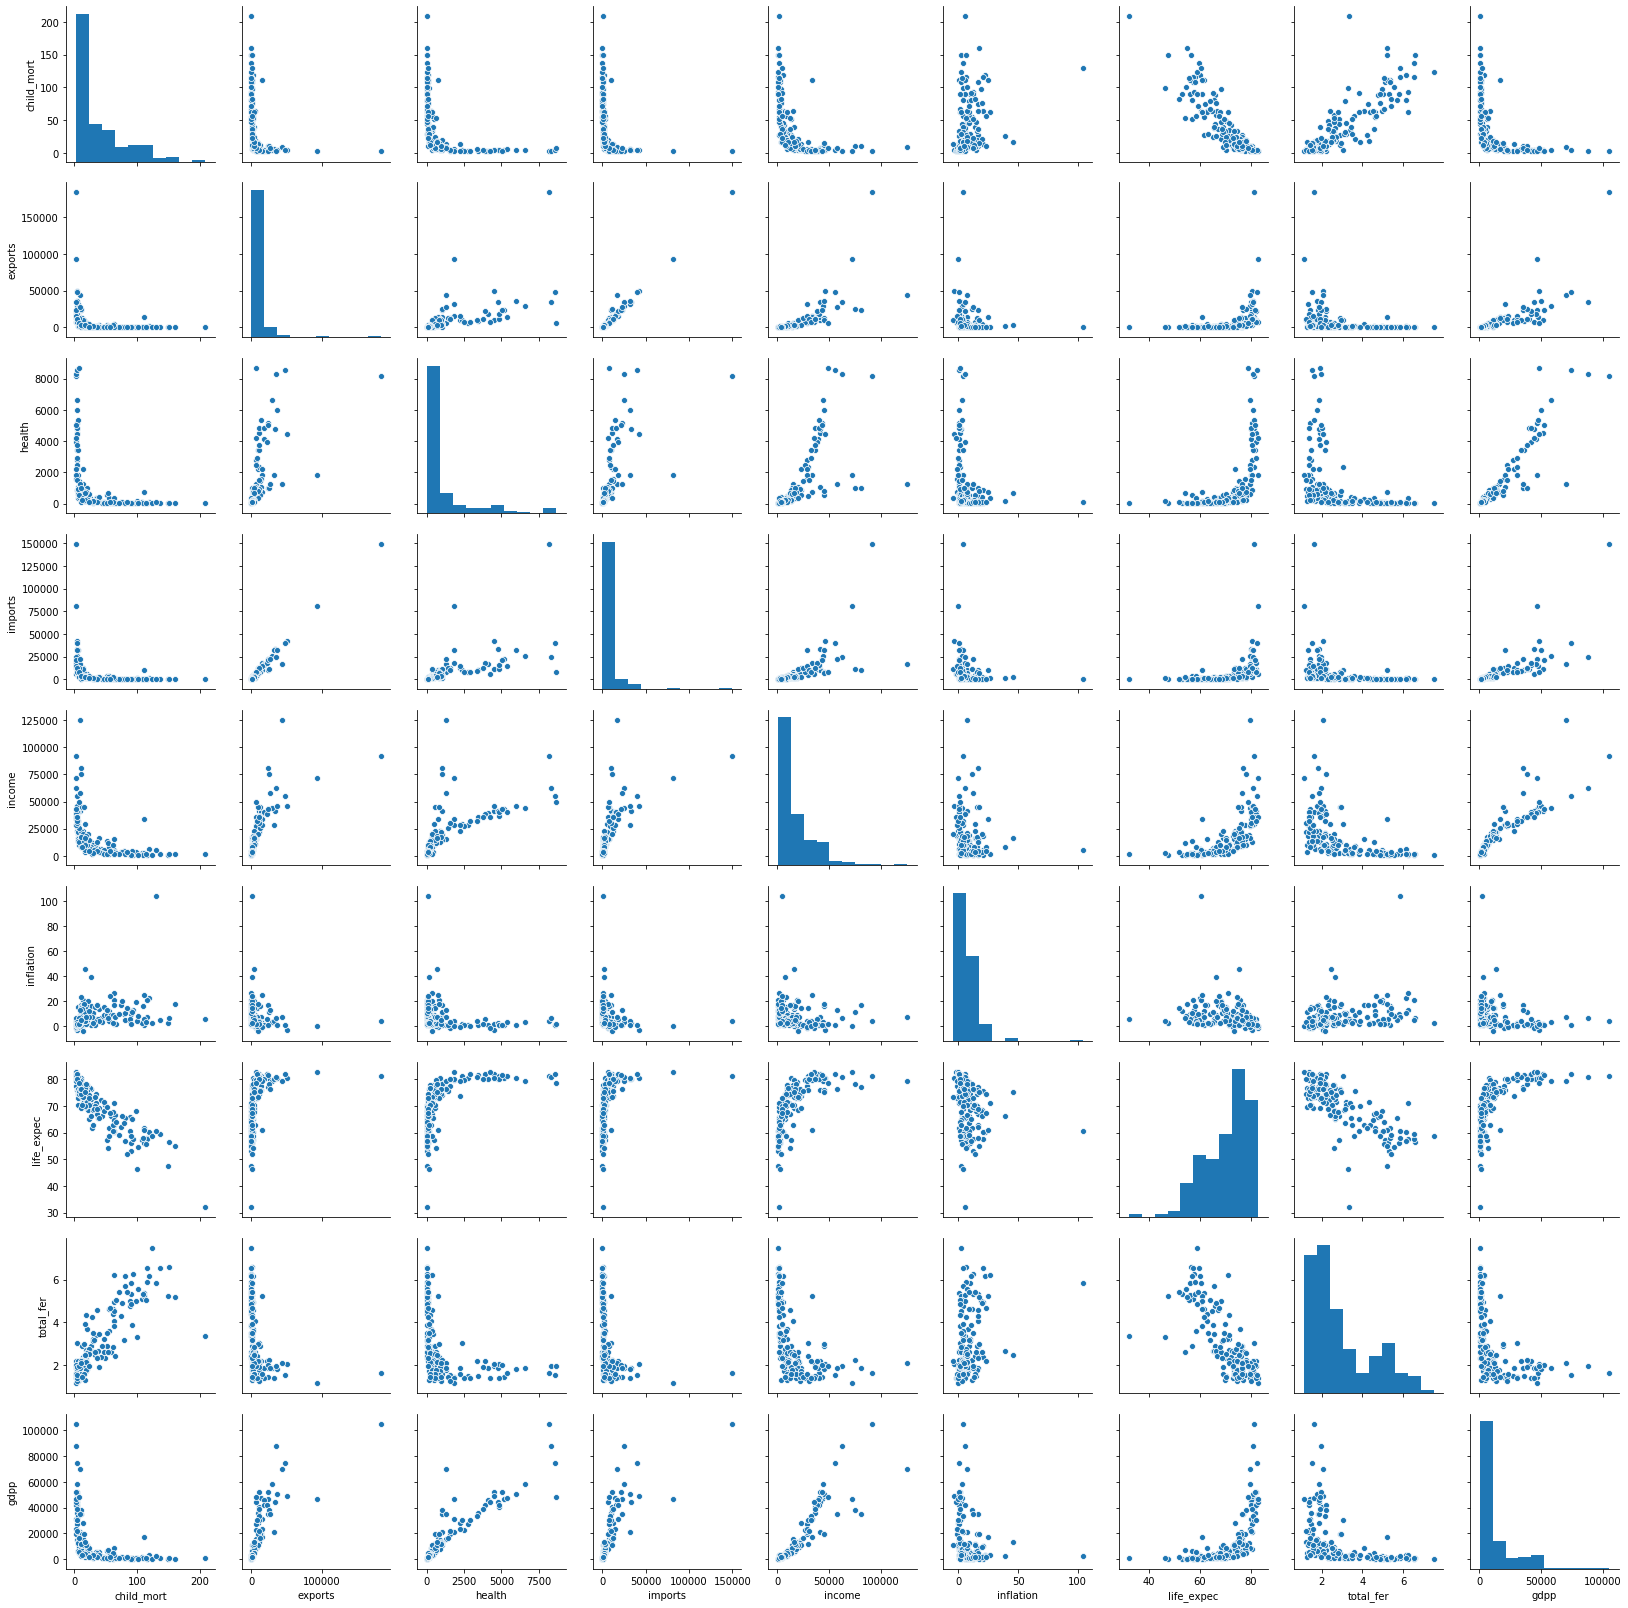

In [7]:
#Checking for the inter-relationships of the attributes
sns.pairplot(df)

We can get some basic insights about the factors that add to a developing/developed nation from their inter-relationships

We can see 
-income,health,export/import have strong linear relationship for a higher GDP
-Child mort,total fer seems to be higher for countries with low GDP
-Inflation seems to be slightly higher for countries with lower income/GDP


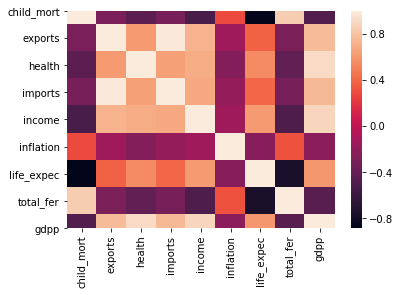

In [8]:
sns.heatmap(df.corr())

We can confirm from the correlation heatmap that high income,export/import,health,life expectancy are signs of a developed nation while higher inflation,child mort,total_fer are signs of under-developed nations and those are the countries we need to address.

Capping the outliers

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


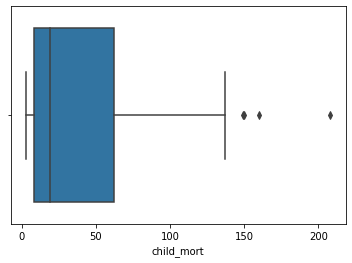

In [9]:
#Since our problem is focussed on countries who need help, we need to restrict outliers that lie in a developed nation's range. We do not cap outliers for under developed nations as we may miss out some countries that actually might require help

#low child mortality can be capped
q = df['child_mort'].quantile(0.01)
df['child_mort'][df['child_mort'] < q] = q
sns.boxplot(df['child_mort'])
plt.show()

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


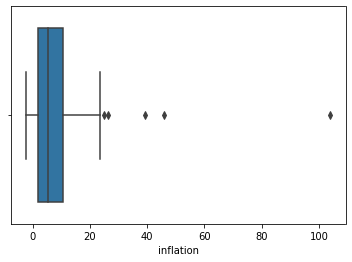

In [10]:
#Capping low inflation outliers

q = df['inflation'].quantile(0.01)
df['inflation'][df['inflation'] < q] = q
sns.boxplot(df['inflation'])
plt.show()

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


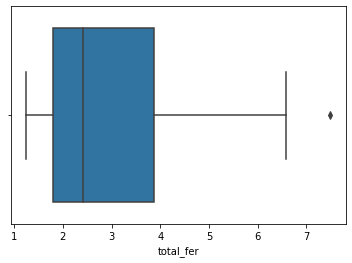

In [11]:
#Capping low total_fer outliers

q = df['total_fer'].quantile(0.01)
df['total_fer'][df['total_fer'] < q] = q
sns.boxplot(df['total_fer'])
plt.show()

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


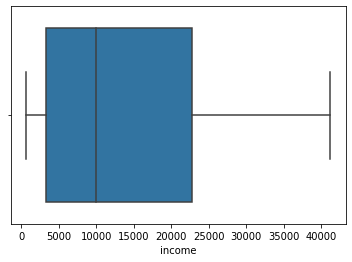

In [12]:
#Capping high income outliers to 90 percentile range. We take a little higher range because countries such income levels are self sufficient

q = df['income'].quantile(0.9)
df['income'][df['income'] > q] = q
sns.boxplot(df['income'])
plt.show()

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


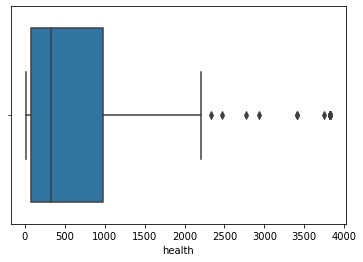

In [13]:
# Similarly Capping countries of high health with 90percentile

q = df['health'].quantile(0.9)
df['health'][df['health'] > q] = q
sns.boxplot(df['health'])
plt.show()

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


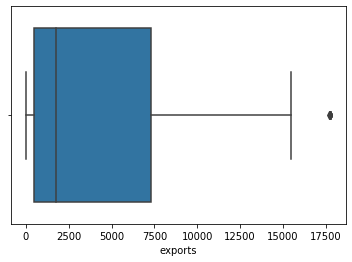

In [14]:
#Same capping applies to both export and import

q = df['exports'].quantile(0.9)
df['exports'][df['exports'] > q] = q
sns.boxplot(df['exports'])
plt.show()

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


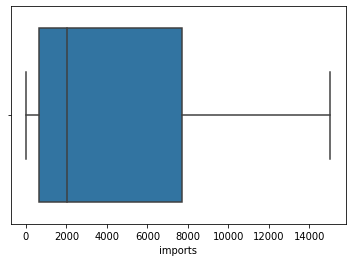

In [15]:
q = df['imports'].quantile(0.9)
df['imports'][df['imports'] > q] = q
sns.boxplot(df['imports'])
plt.show()

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


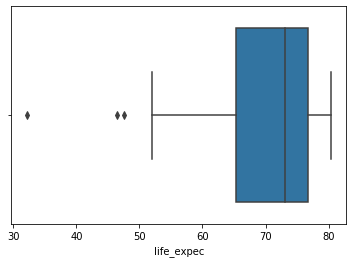

In [16]:
#Capping higher life expectancy to 90percentile range
q = df['life_expec'].quantile(0.9)
df['life_expec'][df['life_expec'] > q] = q
sns.boxplot(df['life_expec'])
plt.show()

C:\Users\soura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


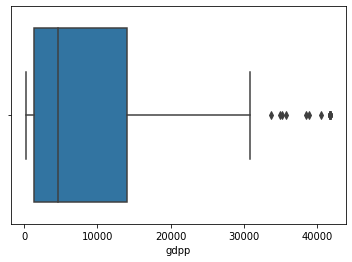

In [17]:
#Overall GDP outliers capped at 90percentile range
q = df['gdpp'].quantile(0.9)
df['gdpp'][df['gdpp'] > q] = q
sns.boxplot(df['gdpp'])
plt.show()

# Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sk = StandardScaler()
scaled_df = sk.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 1.29153663, -0.79728596, -0.67693345, ..., -1.63157361,
         1.90339023, -0.78681132],
       [-0.53899289, -0.61163615, -0.49035208, ...,  0.67101337,
        -0.86081558, -0.53130418],
       [-0.27286971, -0.51498038, -0.55798462, ...,  0.69392468,
        -0.03884551, -0.50457598],
       ...,
       [-0.37235501, -0.64604414, -0.63756038, ...,  0.30443236,
        -0.66195186, -0.73212687],
       [ 0.44839871, -0.7397633 , -0.65551525, ..., -0.33708441,
         1.14107928, -0.73212687],
       [ 1.11495022, -0.71468976, -0.64054103, ..., -2.11271118,
         1.62498101, -0.72129111]])

In [19]:
df_scaled = pd.DataFrame(scaled_df)
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291537,-0.797286,-0.676933,-0.841497,-0.994369,0.156035,-1.631574,1.903390,-0.786811
1,-0.538993,-0.611636,-0.490352,-0.493824,-0.386326,-0.314406,0.671013,-0.860816,-0.531304
2,-0.272870,-0.514980,-0.557985,-0.611211,-0.169272,0.788991,0.693925,-0.038846,-0.504576
3,2.007831,-0.432103,-0.628477,-0.588439,-0.680847,1.387733,-1.184803,2.128769,-0.571758
4,-0.695682,0.138833,-0.104136,0.545147,0.283837,-0.604273,0.728292,-0.542634,0.054549


# K-Means Clustering

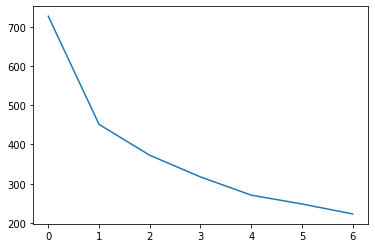

In [20]:
# Checking for optimal number of clusters using the Elbow approach
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

We fundamentally have idea about 3 major types of countries- under-developed/ developing and developed nations. So from the curve we have the ideal option of 3 or 4 clusters

In [21]:
#Let's check the Hopkin's score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
#Let's take the average of 10 iteration of Hopkin's score
a=[]
for i in range(10):
    a.append(hopkins(df_scaled))

print(sum(a)/len(a))

0.884280523298537


Hopkin's value lies between 85-90% which is good value.This shows the data has a good tendency of getting associated into clusters


In [23]:
#Let's check the Silhoutte score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.502967750650663
For n_clusters=3, the silhouette score is 0.4514995113136079
For n_clusters=4, the silhouette score is 0.45408998731006095
For n_clusters=5, the silhouette score is 0.3859688131990442
For n_clusters=6, the silhouette score is 0.3211199413776624
For n_clusters=7, the silhouette score is 0.3218388615301165
For n_clusters=8, the silhouette score is 0.28602830842898513


We can see 3 and 4 seems to provide high silhoutte scores.

Let's proceed with 3 clusters

In [24]:
#Applying the Kmeans package

kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [25]:
#Merging the clustered labels into the dataframe df

df['labels'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


Interpreting the clusters from various attributes

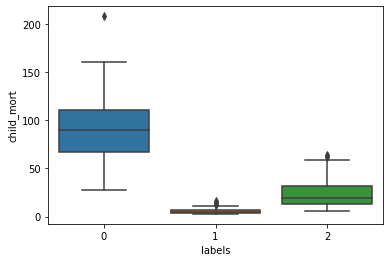

In [26]:
sns.boxplot(x='labels', y='child_mort', data=df)

We can see Cluster 0 seems to have very high child mortality which is a matter of concern. The median is way higher than UN's mentioned limit of 50.

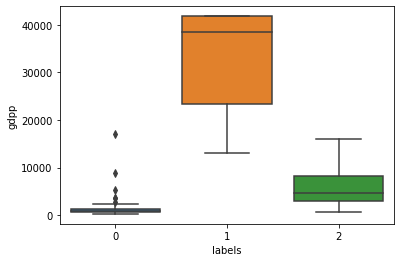

In [27]:
sns.boxplot(x='labels', y='gdpp', data=df)

Cluster 0 seems to have lower GDP while cluster 2 seems to show signs of a developing nation

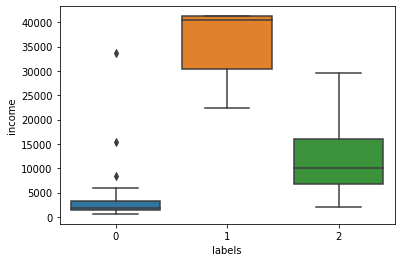

In [28]:
sns.boxplot(x='labels', y='income', data=df)

Similarly cluster 0 shows low level of income as a sign of under developed nation

<b>Cluster inferences</b>

-Cluster 0 is under-developed nation

-Cluster 1 is developed nation

-Cluster 2 is developing nation

Our main focus is on cluster 0

In [29]:
df['labels'].value_counts()

2    81
0    45
1    41
Name: labels, dtype: int64

We have the major 45 countries that are of prime concern. Lets find the top 5 countries to target

In [30]:
target = df[df['labels']==0]
target.sort_values(by=['child_mort','gdpp','income'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0


# Optional - Visualizing using PCA

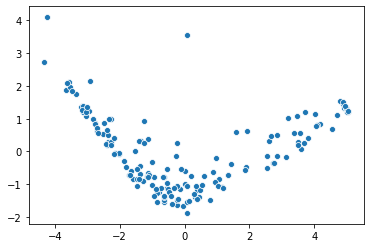

In [31]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)

df_array = pca.transform(df_scaled)

fig, (ax1) = plt.subplots(1, 1)
sns.scatterplot(x= df_array[:, 0], y=df_array[:,1], ax=ax1)

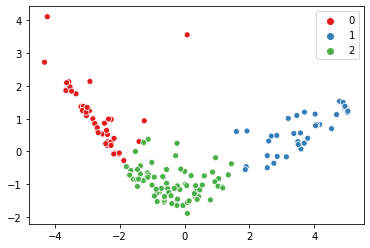

In [32]:
fig, (ax2) = plt.subplots(1, 1)

cmap  = sns.color_palette("Set1", n_colors=3)
sns.scatterplot(x= df_array[:, 0], y=df_array[:,1], hue=kmeans.labels_,  palette = cmap, ax=ax2)

So we can see the 3 clusters formed here

# Hierarchical Clustering

So we have out scaled data stored as 'df_scaled'.Lets perform the clustering on the data set

<b>Single Linkage!</b>


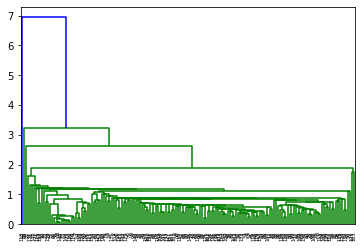

In [33]:
#Lets fit the single linkage with the scaled data

mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [34]:
#Cutting the tree with 3 clusters

h_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
h_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
#Adding the label column to the dataset

df['labels'] = h_labels

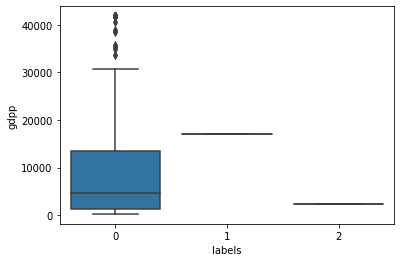

In [36]:
sns.boxplot(x='labels', y='gdpp', data=df)

In [37]:
df[(df['labels']==1) | (df['labels']==2)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.9,60.9,5.21,17100,1
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,2


We see single linkage to be inefficient with 3 clusters. Cluster 1 represents a country with high income and GDP as well as high mortality while Nigeria shows high mortality with sustainable economy. 

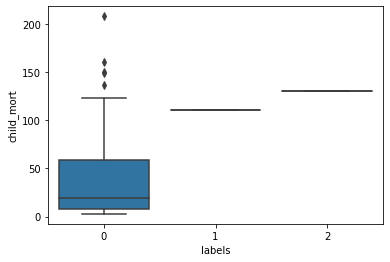

In [38]:
sns.boxplot(x='labels', y='child_mort', data=df)

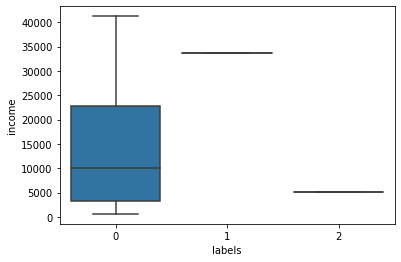

In [39]:
sns.boxplot(x='labels', y='income', data=df)

Lets 

In [40]:
df['labels'].value_counts()

0    165
2      1
1      1
Name: labels, dtype: int64

So the Top 5 countries to focus:-

In [41]:
df[df['labels']==0].sort_values(by=['child_mort','gdpp','income'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0


We obtain the same countries as Kmeans

<b>Complete Linkage!</b>

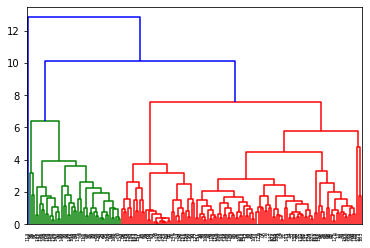

In [42]:
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [43]:
h_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )  
h_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

We see complete linkage to perform better than single linkage 

In [44]:
df['labels'] = h_labels
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,0


In [45]:
df['labels'].value_counts()

1    120
0     46
2      1
Name: labels, dtype: int64

So we obtain 3 clusters

Cluster 1 being the group of High income,gdp and low child mortality
Cluster 0 being the group of low income,gdp and high child mortality
Cluster 2 being the group of average income,gdp and high child mortality

Hence Cluster 0 is the primary target

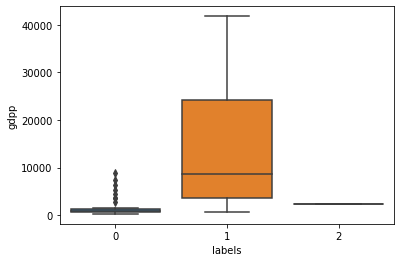

In [46]:
sns.boxplot(x='labels', y='gdpp', data=df)

In [47]:
df[df['labels']==0].sort_values(by=['child_mort','gdpp','income'],ascending=[False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,0


And the results are same!